In [1]:
import numpy as np
import matplotlib.pyplot as plt

STATISTICS

In [2]:
a1  = 2*np.random.randn(100000) + 10

In [3]:
a1.mean()

9.99895927529311

In [4]:
a1.std()

1.9999004536138338

In [5]:
np.percentile(a1,80) #80% elements of a1 are equal or less than 11.68...

11.683494945501609

INTEGRAL AND DERIVATIVES

In [6]:
x = np.linspace(1,10,100)
y = 1/x**2 * np.sin(x)
#derivative
dydx = np.gradient(y,x)
#integral
y_int = np.cumsum(y)*(x[1]-x[0])

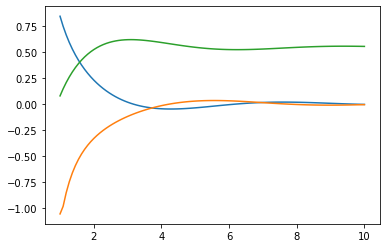

In [7]:
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,y_int)

VECTORIZATION

In [8]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])

In [9]:
first_letter_j = np.vectorize(lambda s: s[0])(names)=='J'

In [10]:
flj = np.array(list(filter(lambda s: s[0]=='J', names))) #alternative

In [11]:
first_letter_j

array([ True, False,  True, False])

In [12]:
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

In [13]:
flj

array(['Jim', 'Josh'], dtype='<U4')

QUESTION 1: y=f(x)=sin(x)*exp^(-x/10)

In [14]:
#10000 x intervals = 10000 + 1 points!
x = np.linspace(0,10,10001)

In [15]:
y = np.sin(x)*np.exp(-x/10)

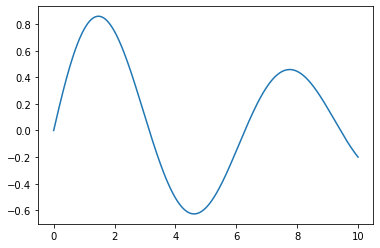

In [16]:
#plot it
plt.plot(x,y)

In [17]:
(x<7)*(x>4) #boolean logic


array([False, False, False, ..., False, False, False])

In [18]:
#compute mean and std of y in that interval
np.mean(y[(x<7)*(x>4)])

-0.2957390706909151

In [19]:
np.std(y[(x<7)*(x>4)])

0.3143635850686723

In [20]:
#For the same range of x, find ym such that 80% of y values are equal or less than it
np.percentile(y[(x<7)*(x>4)], 80)

0.061144931121417924

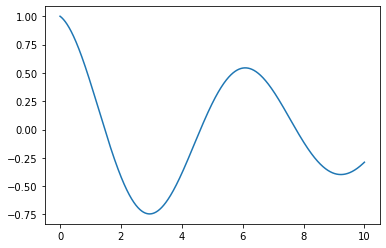

In [21]:
#plot dy/dx vs x
dydx = np.gradient(y,x)
plt.plot(x, np.gradient(y,x))

In [22]:
#Find the location (x) where dy/dx is = 0
#trick: find the negative product of two successive values of dy/dx (change of sign)
#To do that, you have to skip the 1st element and the last one of respectively the 
#first and the second array of factors
dydx[1:]*dydx[:-1]<0

array([False, False, False, ..., False, False, False])

In [23]:
x[1:][dydx[1:]*dydx[:-1]<0] #x[1:] is an array indexed by a boolean array

array([1.472, 4.613, 7.755])

QUESTION 2
Sum the numbers that go from 0 to 10k excepted for those which can be divided by 4 or 7

In [24]:
numbers = np.arange(10001)

In [25]:
numbers

array([    0,     1,     2, ...,  9998,  9999, 10000])

In [26]:
sum(list(filter(lambda x: x%4!=0 and x%7!=0, numbers)))

32147142

In [27]:
#Or
sum(numbers[(numbers%4!=0) * (numbers%7!=0)])

32147142

In [28]:
np.sum(numbers)

50005000

EXERCISE 3 
(see figure in the folder)

In [29]:
theta = np.linspace(0,2*np.pi,1000)
r = 1+0.75*np.sin(3*theta) #polar coordinates
#from polar to cartesian x=r*cos(theta) and y=r*sin(theta)
x = r*np.cos(theta)
y=r*np.sin(theta)


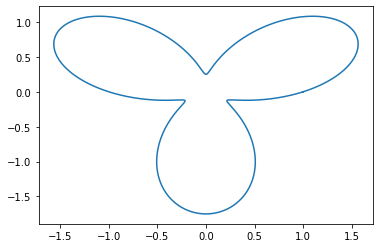

In [30]:
plt.plot(x,y)

In [31]:
A = sum(0.5*r**2*(theta[1]-theta[0]))

In [32]:
A 

4.0283103248029075

In [33]:
drdtheta = np.gradient(r,theta)

In [34]:
L = sum(np.sqrt(r**2+drdtheta**2)*(theta[1]-theta[0]))

In [35]:
L

11.64002156901387

EXERCISE 4 (SEE PICTURE IN FOLDER) DIMENSIONLESS EVALUATION

In [36]:
#2D-functions
x=np.linspace(0,10,1000)
y=x.copy()

In [37]:
xv,yv = np.meshgrid(x,y)

In [38]:
xv #all the same across columns, while yv is all the same across rows

array([[ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       ...,
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ]])

In [39]:
yv

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01001001,  0.01001001,  0.01001001, ...,  0.01001001,
         0.01001001,  0.01001001],
       [ 0.02002002,  0.02002002,  0.02002002, ...,  0.02002002,
         0.02002002,  0.02002002],
       ...,
       [ 9.97997998,  9.97997998,  9.97997998, ...,  9.97997998,
         9.97997998,  9.97997998],
       [ 9.98998999,  9.98998999,  9.98998999, ...,  9.98998999,
         9.98998999,  9.98998999],
       [10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ]])

In [40]:
zv = xv**2 + yv**2

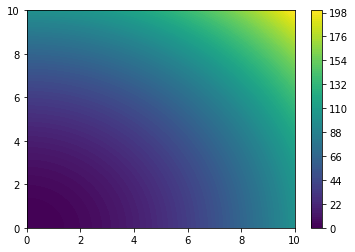

In [41]:
plt.contourf(xv,yv,zv,levels=100)
plt.colorbar()

BASIC LINEAR ALGEBRA

In [42]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])

In [43]:
A

array([[ 3,  2,  1],
       [ 5, -5,  4],
       [ 6,  0,  1]])

In [44]:
b1 = np.array([1,2,3])

In [45]:
b2 = np.array([-1,2,-5])

In [46]:
#matrix product with vector @
A@b1

array([10,  7,  9])

In [47]:
#Transpose of A
A.T

array([[ 3,  5,  6],
       [ 2, -5,  0],
       [ 1,  4,  1]])

In [48]:
np.linalg.inv(A) #inverse of A

array([[-0.09433962, -0.03773585,  0.24528302],
       [ 0.35849057, -0.05660377, -0.13207547],
       [ 0.56603774,  0.22641509, -0.47169811]])

In [49]:
np.dot(b1,b2) #scalar product dot

-12

In [50]:
np.cross(b1,b2)#vectorial product cross

array([-16,   2,   4])

System of equations

In [51]:
b = np.array([4,3,0])

In [52]:
np.linalg.solve(A,b)

array([-0.49056604,  1.26415094,  2.94339623])

FINDING EIGENVALUES

In [53]:
eigs,eigv = np.linalg.eig(A)

In [54]:
eigs #eigenvalues

array([ 5.98847677, -1.66137965, -5.32709712])

In [55]:
eigv #eigenvectors

array([[-0.55522613, -0.36439757,  0.25391074],
       [-0.49573499,  0.43853605, -0.93677764],
       [-0.66781043,  0.82152331, -0.24078411]])

In [56]:
#eigenvectors along columns !
v1 = eigv[:,0]

In [57]:
v1

array([-0.55522613, -0.49573499, -0.66781043])

In [58]:
#Let's check it!
v1*eigs[0]

array([-3.3249588 , -2.96869744, -3.99916722])

In [59]:
A@v1

array([-3.3249588 , -2.96869744, -3.99916722])

**EXERCISE 5**
Let $f(x,y) = e^{-(x^2+y^2)}\sin{x}, -2 \leq x \leq 2 , -2 \leq y \leq 2$

In [60]:
#Make a contour plot
x = np.linspace(-2,2,1000)
y = x.copy()
xv,yv = np.meshgrid(x,y)
f = np.exp(-(xv**2 + yv**2))*np.sin(xv)

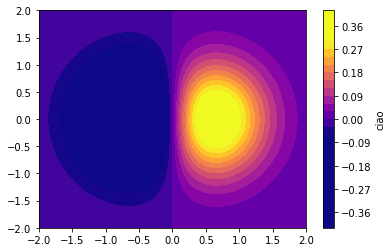

In [93]:

plt.contourf(xv,yv,f, levels=30, vmax=0.3, vmin=-0.05, cmap='plasma')

plt.colorbar(label='ciao')

<a list of 9 text.Text objects>

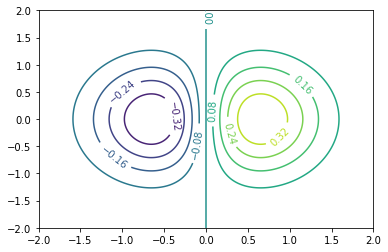

In [97]:
cs = plt.contour(xv,yv,f, levels=10)
plt.clabel(cs, fontsize=10)

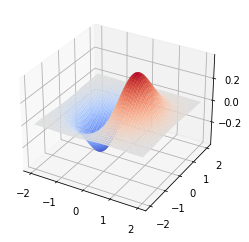

In [99]:
figu, asse = plt.subplots(subplot_kw={'projection':'3d'})
asse.plot_surface(xv,yv,f, cmap='coolwarm')

STREAMPLOTS
For plotting vector fields

In [104]:
w = 3
_ = np.linspace(-3,3,100)
X,Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

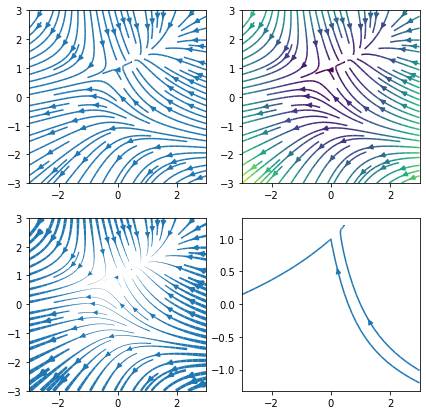

In [105]:
fig,axes = plt.subplots(2,2,figsize=(7,7))
ax = axes[0][0]
ax.streamplot(X,Y,U,V)
ax = axes[0][1]
ax.streamplot(X,Y,U,V, color=speed)
ax = axes[1][0]
lw = 5*speed/speed.max()
ax.streamplot(X,Y,U,V, linewidth=lw)
ax = axes[1][1]
seedpoints = np.array([[0,1],[1,0]]) #starting in 2 different points of the streamlines
ax.streamplot(X,Y,U,V, start_points=seedpoints)

In [62]:
#Volume of |f(x,y)|
np.abs(f.ravel()).sum()*np.diff(x)[0]*np.diff(y)[0] #The numpy.ravel() functions returns contiguous flattened 
#array(1D array with all the input-array elements and with the same type as it). A copy is made only if needed. 

1.4861858145124311

In [63]:
#Volume of |f(x,y)| only in the region where (x^2+y^2)^(1/2) > 1/2
np.abs(f[xv**2 + yv**2 > 0.5**2].ravel()).sum()*np.diff(x)[0]*np.diff(y)[0]

1.3447652930203164

**EXERCISE 6**
see in ht folder

In [64]:
z=np.linspace(0,4*np.pi,100)
t=np.linspace(0,10,100)

In [65]:
tv,zv = np.meshgrid(t,z)

In [66]:
Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv+np.pi/2)
Ez = 0*tv

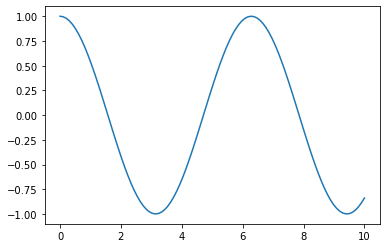

In [67]:
#Ex as function of t at z=0
plt.plot(t, Ex[0])

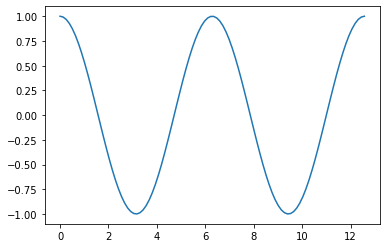

In [68]:
#Plot Ex as a function of z at t=0
plt.plot(z, Ex[:,0])

In [69]:
E = np.array([Ex,Ey,Ez])

In [70]:
#I want triplets with the three values of E to take then the cross product
E = np.swapaxes(E,0,-1)

In [71]:
B = np.cross([0,0,1], E)

In [72]:
#Swap B-axes back
B = np.swapaxes(B,0,-1)

In [73]:
B #all components together

array([[[-1.22464680e-16, -2.01676841e-01, -4.01297713e-01, ...,
          7.29197467e-01,  9.13274975e-01,  1.08804222e+00],
        [ 2.53184907e-01,  5.18400645e-02, -1.50033255e-01, ...,
          4.87574080e-01,  6.80680831e-01,  8.66848471e-01],
        [ 5.02295974e-01,  3.04522843e-01,  1.03645294e-01, ...,
          2.38105444e-01,  4.37134278e-01,  6.31706804e-01],
        ...,
        [-5.02295974e-01, -6.94948515e-01, -8.80516495e-01, ...,
          1.17354604e+00,  1.33087237e+00,  1.47463131e+00],
        [-2.53184907e-01, -4.51948690e-01, -6.46105141e-01, ...,
          9.59087794e-01,  1.13117418e+00,  1.29172897e+00],
        [-1.10218212e-15, -2.01676841e-01, -4.01297713e-01, ...,
          7.29197467e-01,  9.13274975e-01,  1.08804222e+00]],

       [[ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01],
        [ 9.91954813e-01,  9.99664020e-01,  9.97182283e-01, ...,
         -9.69828789e-01, -9.40302293e

In [74]:
Bx, By, Bz = B

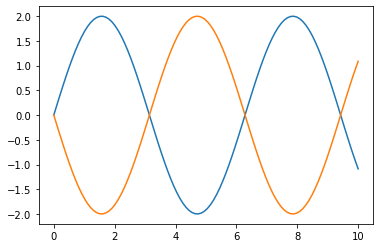

In [75]:
plt.plot(t,Ey[0])
plt.plot(t, Bx[0])

In [76]:
#To compute the Poynting vector B axes must be swapped back again
B = np.swapaxes(B,0,-1)

In [77]:
E

array([[[ 1.00000000e+00,  1.22464680e-16,  0.00000000e+00],
        [ 9.91954813e-01, -2.53184907e-01,  0.00000000e+00],
        [ 9.67948701e-01, -5.02295974e-01,  0.00000000e+00],
        ...,
        [ 9.67948701e-01,  5.02295974e-01,  0.00000000e+00],
        [ 9.91954813e-01,  2.53184907e-01,  0.00000000e+00],
        [ 1.00000000e+00,  1.10218212e-15,  0.00000000e+00]],

       [[ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00],
        [ 9.99664020e-01, -5.18400645e-02,  0.00000000e+00],
        [ 9.88340255e-01, -3.04522843e-01,  0.00000000e+00],
        ...,
        [ 9.37689522e-01,  6.94948515e-01,  0.00000000e+00],
        [ 9.74133253e-01,  4.51948690e-01,  0.00000000e+00],
        [ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00]],

       [[ 9.79663226e-01,  4.01297713e-01,  0.00000000e+00],
        [ 9.97182283e-01,  1.50033255e-01,  0.00000000e+00],
        [ 9.98656304e-01, -1.03645294e-01,  0.00000000e+00],
        ...,
        [ 8.97871191e-01,  8.80516495e-01,

In [78]:
S = np.cross(E,B)

In [79]:
S

array([[[ 0.        , -0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.04807695],
        [ 0.        ,  0.        ,  1.18922593],
        ...,
        [ 0.        , -0.        ,  1.18922593],
        [ 0.        , -0.        ,  1.04807695],
        [ 0.        , -0.        ,  1.        ]],

       [[ 0.        , -0.        ,  1.03050516],
        [ 0.        ,  0.        ,  1.00201554],
        [ 0.        ,  0.        ,  1.06955062],
        ...,
        [ 0.        , -0.        ,  1.36221508],
        [ 0.        , -0.        ,  1.15319321],
        [ 0.        , -0.        ,  1.03050516]],

       [[ 0.        , -0.        ,  1.12077989],
        [ 0.        , -0.        ,  1.01688248],
        [ 0.        ,  0.        ,  1.00805676],
        ...,
        [ 0.        , -0.        ,  1.58148197],
        [ 0.        , -0.        ,  1.31308889],
        [ 0.        , -0.        ,  1.12077989]],

       ...,

       [[ 0.        ,  0.        ,  1.39879671],
        [ 0

In [80]:
#Swap its axes 
S = np.swapaxes(S,0,-1)

In [81]:
S

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.        , -0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.        , -0.        , -0.        , ...,  

In [82]:
Sx, Sy, Sz = S 

**EXERCISE 7** (See in the folder)

In [83]:
N = 1000
x= np.linspace(0,1,N+1)
dx=x[1]-x[0]


In [84]:
len(x)

1001

In [85]:
main_diag = -2*np.ones(N-1)
off_diag = np.ones(N-2)
derivative_matrix = (np.diag(main_diag)+np.diag(off_diag,-1)+np.diag(off_diag,1))/dx**2
x2_matrix = np.diag((10*x[1:-1])**2)
LHS_matrix = derivative_matrix + x2_matrix



In [86]:
LHS_matrix

array([[-1999999.9999,  1000000.    ,        0.    , ...,        0.    ,
               0.    ,        0.    ],
       [ 1000000.    , -1999999.9996,  1000000.    , ...,        0.    ,
               0.    ,        0.    ],
       [       0.    ,  1000000.    , -1999999.9991, ...,        0.    ,
               0.    ,        0.    ],
       ...,
       [       0.    ,        0.    ,        0.    , ..., -1999900.5991,
         1000000.    ,        0.    ],
       [       0.    ,        0.    ,        0.    , ...,  1000000.    ,
        -1999900.3996,  1000000.    ],
       [       0.    ,        0.    ,        0.    , ...,        0.    ,
         1000000.    , -1999900.1999]])

In [87]:
w,v = np.linalg.eigh(LHS_matrix)

eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm that takes advantage of the fact that the matrix is symmetric. If you know that your matrix is symmetric, use this function.
Attention, eigh doesn't check if your matrix is indeed symmetric, it by default just takes the lower triangular part of the matrix and assumes that the upper triangular part is defined by the symmetry of the matrix.

eig works for general matrices and therefore uses a slower algorithm, you can check that for example with IPythons magic command %timeit. If you test with larger matrices, you will also see that in general the eigenvalues are not sorted here.

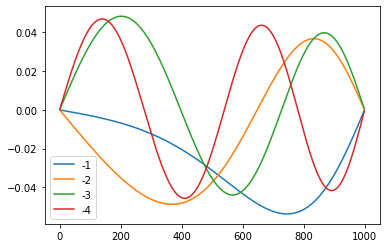

In [88]:
#Plot the smallest eigenvectors
plt.plot(v[:,-1], label='-1')
plt.plot(v[:,-2],label='-2')
plt.plot(v[:,-3],label='-3')
plt.plot(v[:,-4],label='-4')
plt.legend()

In [89]:
w

array([-3.99996995e+06, -3.99992814e+06, -3.99987674e+06, -3.99980784e+06,
       -3.99971929e+06, -3.99961091e+06, -3.99948273e+06, -3.99933478e+06,
       -3.99916707e+06, -3.99897962e+06, -3.99877242e+06, -3.99854549e+06,
       -3.99829883e+06, -3.99803245e+06, -3.99774634e+06, -3.99744051e+06,
       -3.99711497e+06, -3.99676971e+06, -3.99640475e+06, -3.99602008e+06,
       -3.99561571e+06, -3.99519164e+06, -3.99474788e+06, -3.99428444e+06,
       -3.99380131e+06, -3.99329850e+06, -3.99277601e+06, -3.99223386e+06,
       -3.99167205e+06, -3.99109058e+06, -3.99048945e+06, -3.98986868e+06,
       -3.98922827e+06, -3.98856823e+06, -3.98788856e+06, -3.98718927e+06,
       -3.98647037e+06, -3.98573186e+06, -3.98497376e+06, -3.98419606e+06,
       -3.98339878e+06, -3.98258192e+06, -3.98174549e+06, -3.98088951e+06,
       -3.98001397e+06, -3.97911890e+06, -3.97820428e+06, -3.97727015e+06,
       -3.97631650e+06, -3.97534334e+06, -3.97435069e+06, -3.97333855e+06,
       -3.97230693e+06, -

In [90]:
w[-1]

29.855323222417002

BASIC DATASETS see folder